<h1><center>Laboratorio 3: El Pandas no muerde (act. I) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Matías Rojas y Mauricio Araneda
- Auxiliar: Ignacio Meza D.
- Ayudante: Rodrigo Guerra

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Cristóbal Alcázar
- Nombre de alumno 2: Gianina Salomó


### **Link de repositorio de GitHub:** `https://github.com/alcazar90/sci-prog-lab`

### Reglas:

- **Grupos de máximo 2 personas**
- **Ausentes** deberán realizar la actividad solos. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer material del curso que estimen conveniente.

### Temas a tratar

- Introducción al manejo de datos tabulares por medio de la libreria `pandas`.

### Objetivos principales del laboratorio

- Entender, aplicar y aprovechar las ventajas que nos ofrece la libreria `pandas` para manejar datos tabulares.
- Aprender a utilizar la documentación de pandas (y en general, de cualquier librería de python) como también a buscar soluciones en la web.

> **Nota**: El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

### Librerias utiles para el Lab 😸

In [1]:
# Libreria Core del lab.
import numpy as np
import pandas as pd
from IPython.display import display

#Libreria para plotear
!pip install --upgrade plotly
import plotly.express as px

import matplotlib.pyplot as plt

# Librerias utiles
from sklearn.preprocessing import StandardScaler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.2 MB 250 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


# 1. Rendimiento en Estudiantes 📚

Para este laboratorio deberán trabajar con el dataset `students_grades.json` el cual contiene información sobre el rendimiento de alumnos en distintos ramos. 
El objetivo principal será el de realizar un trabajo de limpieza de prepración y exploración de datos utilizando exclusivamente `DataFrames` y sus métodos asociados. 




In [2]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except: 
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


## 1.1 Carga e Inspección de Datos [1.5 Puntos]


<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1hZZaPQlZe4VupFOXt76_wjuUA5NpUhrw" width="300" height="300">
</p>


*Don Caguayo*, rector de la Universidad de la Cachaña, les comenta que actualmente la Universidad no tiene una subdirección de análisis de datos, pero que tiene un gran interés en formar una. Es por esto, que se contacta con ud. y su equipo para iniciar de forma exploratoria diversas tareas de análisis y consolidación de datos respectivos al rendimiento de sus alumnos.

Previo a su primera reunión con el rector, el rector le envía una copia de la base de datos, la cuál a usted y su equipo le encantaría examinar. Para esto, la primera tarea que debe realizar es abrir y cargar el dataset. 


> **Notar que es sumamente importante el formato que posee cada columna** para su manipulación y que posiblemente ustedes deberán especificar algunos tipos de datos a mano. Ver la documentación del método `read_json` para mayor información.

A continuación se muestra un ejemplo de los dos primeros registros del dataset:

```json
[
  {
    "names": "Rita Courtney",
    "gender": "female",
    "race/ethnicity": "group B",
    "parental level of education": "some high school",
    "lunch": "standard",
    "test preparation course": "none",
    "math score": 37,
    "reading score": 46,
    "writing score": 46
  },
  {
    "names": "Madeline Fuller",
    "gender": "female",
    "race/ethnicity": "group C",
    "parental level of education": "some high school",
    "lunch": "standard",
    "test preparation course": "none",
    "math score": 124,
    "reading score": 142,
    "writing score": 142
  }
]
```






### Lectura y procesamiento inicial
No está leyendo las columnas `score` como númericas al ocupar `dtype`; Hay un bug con `pd.read_json`: https://github.com/pandas-dev/pandas/issues/33205. Por tanto, se cambia los tipos correspondientes una vez que ya se ha cargado el objeto `DataFrame`.

Las columnas `math score`, `reading score` y `writing score` tienen algunos datos de tipo `string` vacíos. Con el objetivo de poder dejar estas columnas con un único tipo de dato, se reemplaza estos casos como valores `np.nan`, para así poder asignar el tipo `float32` a estas columnas.

Se observa en el ejemplo que la columna `test preparation course` tiene valores "none" como `string`. Como no se menciona como requerimiento que se deba considerar estas cadenas como datos nulos, por el momento se mantiene este valor, ya que al ser el atributo originalmente de tipo de cadenas de texto, es posible que el texto "none" sea un valor deseado.

In [113]:
# Cargamos el json al repositorio https://github.com/alcazar90/sci-prog-lab/data
df_grades = pd.read_json(
    "https://raw.githubusercontent.com/alcazar90/sci-prog-lab/main/data/students_grades.json"
)

# Reemplazo de string vaciós por nan
df_grades.loc[:, [
    "math score", "reading score", "writing score"
]] = df_grades[["math score", "reading score", "writing score"]].replace(
    [""], [np.nan]
)

# Cambira las columnas anteriores a float32
dtypes = {"math score": "float32",
          "reading score": "float32",
          "writing score": "float32"}

df_grades = df_grades.astype(dtypes)

In [114]:
df_grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   names                        1400 non-null   object 
 1   gender                       1400 non-null   object 
 2   race/ethnicity               1400 non-null   object 
 3   parental level of education  1400 non-null   object 
 4   lunch                        1400 non-null   object 
 5   test preparation course      1400 non-null   object 
 6   math score                   1360 non-null   float32
 7   reading score                1360 non-null   float32
 8   writing score                1353 non-null   float32
dtypes: float32(3), object(6)
memory usage: 82.2+ KB



<p align="center">
  <img src="https://i.giphy.com/media/4FQMuOKR6zQRO/giphy.webp">
</p>


Posteriormente, el rector les comenta que la sección de TI posee una base de datos con más de **875** filas, en donde cada fila representa un alumno matriculado. Sin embargo, cree fuertemente que existen errores en esta: solo tiene registro de **875** matriculas. Por este motivo, especula que se han realizado malas prácticas al registrar dichos datos.

En consecuencia, el rector les solicita a ustedes como tarea inicial que exploren la base de datos y encuentre posibles falencias dentro de sus registros. Para esto, usted debe estar al tanto que las notas están en una escala que van del **0 al 100** (porcentaje de logro) y **no es posible que un alumno haya dado más de una vez el mismo examen**. Cualquier alumno que posea un valor diferente a esta escala, debería ser eliminado de la base de datos.


### Exploración inicial sobre las falencias mencionadas
- Por ahora solo se solicita explícitamente eliminar de la base a aquellos alumnos que posean porcentajes de logro menores a 0 o mayores a 100, por lo que se realiza esta solicitud.
- Se menciona que un alumno no puede aparecer 2 veces (no puede dar 2 veces un examen), pero no se menciona que se deba elimnar estos casos, por lo que por ahora se mantienen. Se debe considerar además que dado que no existe un identificador único (dos personas pueden tener el mismo nombre), no hay forma de asegurar que dos entradas con el mismo nombre no correspondan a personas diferentes.

In [115]:
# Se aplica solicitud de eliminar filas con puntajes menores a 0 o mayores a 100
df_clean = df_grades[
    (df_grades["math score"] >= 0) & (df_grades["math score"] <= 100)
    & (df_grades["reading score"] >= 0) & (df_grades["reading score"] <= 100)
    & (df_grades["writing score"] >= 0) & (df_grades["writing score"] <= 100)
]

print(f"De {df_grades.shape[0]} registros originales, se obtiene finalmente un "
f"set con {df_clean.shape[0]} registros luego de aplicar la limpieza solicitada.")

De 1400 registros originales, se obtiene finalmente un set con 1003 registros luego de aplicar la limpieza solicitada.


Ya que se aplica el filtro de condición que se debe cumplir, automáticamente se eliminan los datos nulos que había presentes en las notas

In [116]:
df_clean.isna().sum()

names                          0
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

- Se explora las ocurrencias de nombres repetidos. Esto se realiza ***posterior*** a la aplicación del filtro de notas, ya que es posible que la causa de registros repetidos fuera por la presencia de filas de registros con notas inválidas, y que luego se hiciera una nueva entrada con las notas correctas.
- Si se aplicase una limpieza de nombre previo a la eliminación de las notas no válidas, es posible que al aplicar `drop_duplicates(subset=["names"])` se eliminase las filas con las notas válidas, conservando las filas con las notas incorrectas. En este caso, luego, al eliminar las notas inválidas, se estaría potencialmente perdiendo registros de alumnos que sí tenían un registro válido, pero que debido al orden de ejecución del pre procesamiento, quedaron eliminados.

In [117]:
# Ejemplo de la situación planteada anteriormente
names_counts_before = df_grades["names"].value_counts()
df_grades[
    df_grades["names"].isin(names_counts_before[names_counts_before > 1].index)
].sort_values(by=["names"]).head(6)

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
422,Aaron Oakden,male,group D,high school,free/reduced,none,66.0,74.0,69.0
441,Aaron Oakden,male,group D,high school,free/reduced,none,NaN,193.0,124.0
329,Adam Romero,male,group C,high school,standard,completed,53.0,52.0,49.0
1393,Adam Romero,male,group C,high school,standard,completed,124.0,193.0,49.0
1395,Alexander Dillon,male,group D,associate's degree,standard,none,193.0,142.0,193.0
31,Alexander Dillon,male,group D,associate's degree,standard,none,80.0,75.0,77.0


- Se observa que el primero de los registros de Alezander Dillon, tiene notas fuera de rango por lo que podría corresponder a una entrada incorrecta (de todas formas con la información entregada no hay forma de corroborar esto, es solo una suposición). Al aplicar drop duplicates en names, por defecto se conserva la primera fila de los duplicados, por lo que en este caso se conservaría la fila con las notas 193, 142 y 193, y se perdería la potencial fila con el ingreso correcto que tiene notas 80, 75 y 77.

In [118]:
# Nombres repetidos posterior a la limpieza de notas
names_counts = df_clean["names"].value_counts()
print(f"Existen {names_counts[names_counts > 1].shape[0]} nombres con al menos 2"
f" ocurrencias en los datos entregados")

Existen 3 nombres con al menos 2 ocurrencias en los datos entregados


- Aplicando este orden, solo quedan 3 nombres duplicados.

In [119]:
sorted(names_counts[names_counts > 1].index)

['Anthony Malcomb', 'Charles Jackson', 'Justin Harris']

In [120]:
# Registros con nombres repetidos posterior a la limpieza de notas válidas
df_clean[
    df_clean["names"].isin(names_counts[names_counts > 1].index)
].sort_values(by=["names"])

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
66,Anthony Malcomb,male,group C,some college,free/reduced,none,35.0,28.0,27.0
900,Anthony Malcomb,male,group C,some college,free/reduced,none,35.0,28.0,27.0
562,Charles Jackson,male,group E,some high school,standard,none,30.0,26.0,22.0
1223,Charles Jackson,male,group E,some high school,standard,none,30.0,26.0,22.0
816,Justin Harris,male,group D,some college,standard,none,40.0,42.0,38.0
827,Justin Harris,male,group D,some college,standard,none,40.0,42.0,38.0


- Para el caso de estos 3 nombres, efectivamente corresponde a registros 100% duplicados (tienen los mismos valores en todas las columnas). Aún así ***sigue existiendo la posibilidad*** de que correspondan a casos de personas con el mismo nombre y características y que hayan obtenido los mismos resultados, ya que al no haber un identificador único, no hay forma de corroborar esto.

> **Instrucciones**

**Cree una función** que tome un `DataFrame` y que le permita revisar si las diferentes variables que lo componen son coherentes y si es posible observar anomalías en estas. 

**To-Do**
1. [X] Imprimir un mensaje con las dimensiones del Dataframe.
2. [X] Imprimir un mensaje con los nombres de las columnas que conforman el DataFrame.
3. [X] Mostrar los primeros 5, los últimos 5 elementos del DataFrame y realice un muestreo de 5 elementos de forma aleatoria.
4. [X] Mostrar una descripción rápida de las variables numéricas del DataFrame (utilice un método visto en clases).
5. [X] Imprimir un mensaje con la cantidad de valores nulos (investigue el método `isna()` y `sum()` de los DataFrames).
6. [X] Imprimir un mensaje que detalle la cantidad de valores unicos (investigue `nunique()`) .
7. [X] Imprimir un mensaje con el total de filas que contengan nombres duplicados (investigue `duplicated()` y su parámetro `subset`).
8. [X] Mostrar las filas que contengan nombres sean duplicados (investigue `duplicated()` y su parámetro `subset`).
9. [X] A traves de `.plot.box()` plotear el boxplot de las notas. De ser necesario, invetigue como funcionan los gráficos de caja (esta sección es provista).
10. [X] Finalmente responda la siguiente pregunta:

> ¿Que anomalias es posible observar de los datos que componen el DataFrame? ¿Existen valores nulos o duplicados? ¿Qué puede interpretar de la distribución de las notas en el boxplot? (), comente esto en la celda ubicada debajo de **justificación**.

> **Nota:** Para imprmir utilice `print(...)`. Para mostrar `DataFrames`, utilice `display(...)` ya que este permite mostrar estos elementos como tablas.

> **Nota 2:** Utilice la documentación de [pandas](https://pandas.pydata.org/docs/index.html) como también StackOverflow para resolver cualquier problema o inconveniente.

> **Nota 3:** Si no ha trabajado con boxplot antes, el siguiente link puede serle de mucha ayuda: [boxplot](https://medium.com/dayem-siddiqui/understanding-and-interpreting-box-plots-d07aab9d1b6c) 

**Respuesta:**

In [121]:
def exploratory_data_analysis(dataframe):

    # Pto. 1: Dimensiones del dataset
    print(f"1.- El DataFrame tiene {dataframe.shape[0]} filas y"
          f" {dataframe.shape[1]} columnas\n")
    
    # Pto. 2: Nombre de columnas
    print("2.- El DataFrame esta compuesto por las siguientes columnas: " 
          f"{', '.join(dataframe.columns)}\n")

    # Pto. 3: Visualizar primeras 5, últimas 5 y aleatoriamente 5
    print("3.- Ejemplos de filas del DataFrame:\n")
    print("Primeras 5 filas:\n")
    display(dataframe.head())
    print("\n")
    print("Últimas 5 filas:\n")
    display(dataframe.tail())
    print("\n")
    print("Muestreo aleatorio de 5 filas:\n")
    display(dataframe.sample(n=5))
    print("\n")

    # Pto. 4: Descripcción rápida de las variables númericas. El método 
    # .describe() averiguará cuáles puedes compactarse en agregados estadísticos
    print("4.- Descripcción numérica del DataFrame:\n")
    display(dataframe.describe())
    print("\n")

    # Pto. 5: Cantidad de valores nulos
    null_counts = dataframe.isna().sum()
    print("5.- Cantidad de valores nulos por columna:\n"
          f"{null_counts}\nTOTAL DE NULOS: {null_counts.sum()}\n")

    # Pto. 6: Cantidad de valores únicos por columna
    print("6.- Cantidad de valores únicos por columna:\n"
          f"{dataframe.nunique()}\n")

    # Pto. 7: Cantidad de valores duplicados en columna "name"
    dup_names = dataframe.duplicated(subset=['names'])
    print(f"7.- Presenta un total de {dup_names.sum()}"
          " filas con nombres duplicados.\n")
    
    # Pto. 8: "Mostrar las filas que contengan nombres sean duplicados"
    print("8.- Las filas con nombres duplicados son:\n")
    display(dataframe.loc[dup_names, :])
    print("\n")

    # Pto. 9: Boxplot sobre las notas
    print("9.- Boxplot de notas:\n")
    np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
    # Cristóbal: En la respuesta esperada utiliza plotly para el boxplot
    # y no dataframe.plot(kind="box") como aparece en las instrucciones.
    # De todas maneras van las dos formas:
    """
    fig = px.box((dataframe
                    .loc[:, ["math score", "reading score", "writing score"]]
                    .melt()
                    .rename(columns={"variable": "subject", "value":"score"})), 
                 x="subject", y="score", color="subject")
    fig.show()
    """
    # Con plot(kind="box")
    dataframe.plot(kind="box")


1.- El DataFrame tiene 1400 filas y 9 columnas

2.- El DataFrame esta compuesto por las siguientes columnas: names, gender, race/ethnicity, parental level of education, lunch, test preparation course, math score, reading score, writing score

3.- Ejemplos de filas del DataFrame:

Primeras 5 filas:



,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,37.0,46.0,46.0
1,Madeline Fuller,female,group C,some high school,standard,none,124.0,142.0,142.0
2,Daniel Rester,male,group E,associate's degree,standard,none,156.0,196.0,193.0
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,80.0,78.0,81.0
4,Geraldine Hale,female,group A,associate's degree,standard,none,131.0,166.0,166.0




Últimas 5 filas:



,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1395,Alexander Dillon,male,group D,associate's degree,standard,none,193.0,142.0,193.0
1396,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,66.0,74.0,81.0
1397,Laurie Carter,female,group B,some high school,standard,completed,54.0,61.0,62.0
1398,Joseph Mccoy,male,group D,some college,free/reduced,none,193.0,196.0,193.0
1399,Amanda Perez,female,group A,high school,standard,completed,68.0,80.0,76.0




Muestreo aleatorio de 5 filas:



,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
39,Betty Buntin,female,group A,bachelor's degree,standard,none,59.0,72.0,70.0
92,Shaun Johnson,male,group C,associate's degree,standard,none,58.0,54.0,52.0
1208,Mauricio Deering,male,group D,high school,free/reduced,none,193.0,NaN,124.0
1351,Timothy Long,male,group C,high school,standard,completed,72.0,67.0,64.0
1341,Jose Rogers,male,group D,some college,free/reduced,none,77.0,62.0,64.0




4.- Descripcción numérica del DataFrame:



,math score,reading score,writing score
count,1360.000000,1360.000000,1353.000000
mean,89.538971,93.086029,91.852921
std,47.152424,46.385777,47.043568
min,0.000000,17.000000,10.000000
25%,59.000000,63.000000,62.000000
50%,72.000000,76.000000,75.000000
75%,97.250000,100.000000,100.000000
max,196.000000,196.000000,196.000000




5.- Cantidad de valores nulos por columna:
names                           0
gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
math score                     40
reading score                  40
writing score                  47
dtype: int64
TOTAL DE NULOS: 127

6.- Cantidad de valores únicos por columna:
names                          1153
gender                            2
race/ethnicity                    5
parental level of education       6
lunch                             2
test preparation course           2
math score                       96
reading score                    88
writing score                    92
dtype: int64

7.- Presenta un total de 247 filas con nombres duplicados.

8.- Las filas con nombres duplicados son:



,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
12,Rita Courtney,female,group B,some high school,standard,none,193.0,193.0,193.0
81,Elizabeth Quintero,female,group B,some college,standard,none,82.0,85.0,87.0
160,Michelle Gonzales,female,group B,some high school,standard,completed,60.0,70.0,74.0
170,Carla Mendoza,female,group D,associate's degree,free/reduced,none,43.0,60.0,58.0
176,Darlene Parker,female,group C,associate's degree,standard,none,54.0,61.0,58.0
...,...,...,...,...,...,...,...,...,...
1385,James Crawford,male,group D,master's degree,standard,none,193.0,147.0,131.0
1390,Gloria Bradford,female,group B,high school,standard,none,124.0,64.0,193.0
1393,Adam Romero,male,group C,high school,standard,completed,124.0,193.0,49.0
1395,Alexander Dillon,male,group D,associate's degree,standard,none,193.0,142.0,193.0




9.- Boxplot de notas:



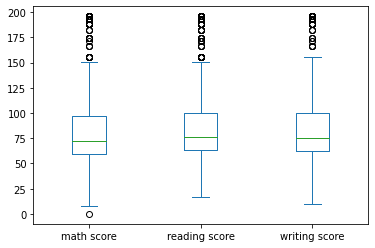

In [122]:
exploratory_data_analysis(df_grades)

**Justificación:**

¿Que anomalias es posible observar de los datos que componen el DataFrame? ¿Existen valores nulos o duplicados? ¿Qué puede interpretar de la distribución de las notas en el boxplot? 

```
¿Que anomalias es posible observar de los datos que componente el DataFrame?

- Cantidad de registros: se reportan 1153 nombres únicos pero tenemos 1400
observaciones. Según la información proporcionada por el rector "no es posible
que el alumno haya dado más de una vez el mismo examen". Como se explicó previamente, 
no existe un identificador único por fila (puede haber 2 personas que se llamen igual), 
pero para el caso de este ejercicio se considerará que los nombres son únicos.
Por lo tanto, bajo este supuesto, sí tenemos registros duplicados.

- Hay alumnos que no rindieron todas las pruebas. Esto se puede observar a través
de los valores nulos en los scores. Se detalla en la siguiente respuesta.

- La escala de puntaje va de 0 a 100. Sin embargo, se observa en el dataframe
con la descripcción de variables númericas y en el boxplot que hay puntajes
sobre los 100. Sin embargo, no hay ningún puntaje "negativo".

¿Existen valores nulos o duplicados? Sí, detalle a continuación:

- Math: 40 nulos
- Reading: 40 nulos
- Writing: 47 nulos

- Existen 247 nombres duplicados

¿Que puede interpretar de la distribución de las notas en el boxplot?

- Si contabilizamos que los valores anómalos, puntajes sobre 100 y que no
están dentro de la escala, son más o menos iguales en los 3 tipos de prueba
tanto en cantidad como cuantía. La mediana de los puntajes de matemática
es la menor de los 3 examenes, seguida por escritura y lectura. Además,
la única prueba donde hay un puntaje de 0 es matématica.


```

**Respuesta Esperada:**

1.- El DataFrame tiene 1400 filas y 9 columnas

2.- El DataFrame esta compuesto por las siguientes columnas: names, gender, race/ethnicity, parental level of education, lunch, test preparation course, math score, reading score, writing score

3.- Ejemplos de filas del DataFrame:

Primeras 5 filas:



,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,37.0,46.0,46.0
1,Madeline Fuller,female,group C,some high school,standard,none,124.0,142.0,142.0
2,Daniel Rester,male,group E,associate's degree,standard,none,156.0,196.0,193.0
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,80.0,78.0,81.0
4,Geraldine Hale,female,group A,associate's degree,standard,none,131.0,166.0,166.0




Últimas 5 filas:



,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1395,Alexander Dillon,male,group D,associate's degree,standard,none,193.0,142.0,193.0
1396,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,66.0,74.0,81.0
1397,Laurie Carter,female,group B,some high school,standard,completed,54.0,61.0,62.0
1398,Joseph Mccoy,male,group D,some college,free/reduced,none,193.0,196.0,193.0
1399,Amanda Perez,female,group A,high school,standard,completed,68.0,80.0,76.0




Muestreo aleatorio de 5 filas:



,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1242,Kim Adams,female,group A,some college,standard,none,58.0,70.0,67.0
690,Edith Cervera,female,group C,some college,standard,none,62.0,69.0,69.0
1278,Donna Duarte,female,group C,high school,standard,none,65.0,69.0,67.0
1292,Oscar Markow,male,group C,some high school,free/reduced,completed,196.0,142.0,124.0
159,Melissa Flores,female,group D,some college,free/reduced,completed,70.0,78.0,78.0




4.- Descripcción numérica del DataFrame:



,math score,reading score,writing score
count,1360.000000,1360.000000,1353.000000
mean,89.538971,93.086029,91.852921
std,47.152424,46.385777,47.043568
min,0.000000,17.000000,10.000000
25%,59.000000,63.000000,62.000000
50%,72.000000,76.000000,75.000000
75%,97.250000,100.000000,100.000000
max,196.000000,196.000000,196.000000




5.- Cantidad de valores nulos por columna:
names                           0
gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
math score                     40
reading score                  40
writing score                  47
dtype: int64
TOTAL DE NULOS: 127

6.- Cantidad de valores únicos por columna:
names                          1153
gender                            2
race/ethnicity                    5
parental level of education       6
lunch                             2
test preparation course           2
math score                       96
reading score                    88
writing score                    92
dtype: int64

7.- Presenta un total de 247 filas con nombres duplicados.

8.- Las filas con nombres duplicados son:



,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
12,Rita Courtney,female,group B,some high school,standard,none,193.0,193.0,193.0
81,Elizabeth Quintero,female,group B,some college,standard,none,82.0,85.0,87.0
160,Michelle Gonzales,female,group B,some high school,standard,completed,60.0,70.0,74.0
170,Carla Mendoza,female,group D,associate's degree,free/reduced,none,43.0,60.0,58.0
176,Darlene Parker,female,group C,associate's degree,standard,none,54.0,61.0,58.0
...,...,...,...,...,...,...,...,...,...
1385,James Crawford,male,group D,master's degree,standard,none,193.0,147.0,131.0
1390,Gloria Bradford,female,group B,high school,standard,none,124.0,64.0,193.0
1393,Adam Romero,male,group C,high school,standard,completed,124.0,193.0,49.0
1395,Alexander Dillon,male,group D,associate's degree,standard,none,193.0,142.0,193.0




9.- Boxplot de notas:



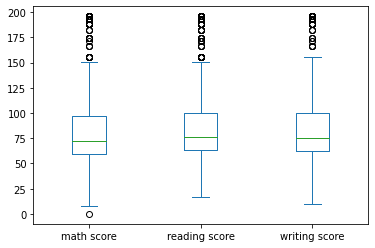

In [123]:
exploratory_data_analysis(df_grades)

## 1.2 Limpieza de Datos [1 punto]

<p align="center">
  <img src="https://blogdatlas.files.wordpress.com/2020/07/datlas_mx_blog_limpieza_bds_data-scrubbing-service.gif">
</p>


En base a lo realizado anteriormente, realice una limpieza de los dataset. Asuma los supuestos señalados en la pregunta anterior para limpiar el `DataFrame` y cree una función que le permita limpiar los datos. Una vez limpiado cada uno de los `DataFrames` compruebe nuevamente los datos con la función creada en la sección 1.1.

**To-Do:**

- [X] Crear función que permita limpiar el dataset.
- [X] Comprobar que no existen anomalías en los datos a traves de la función de la sección 1.1.

**Hint**

Puede ser útil los métodos ```.drop_duplicates()``` y ```.dropna()``` como también utilizar queries con máscaras booleanas.


**Respuesta:**

- Como se mencionó previamente, pese a que no se puede considerar el nombre de un alumno como un identificador único, para este caso se asume que registros con nombres repetidos corresponde a registros duplicados, por lo que se elimina alguno de los registros con nombre duplicado.

In [124]:
def clean_data(df: pd.DataFrame) -> pd.DataFrame:
  """Remover observaciones con nombre duplicado, scores con NAN y sobre 100"""
  
  gt100 = ((df_grades["math score"] > 100)    | 
           (df_grades["reading score"] > 100) | 
           (df_grades["writing score"] > 100))
  
  return (df
    .drop_duplicates(subset=["names"])
    .dropna(how="any")
    .loc[~gt100, :]
    .reset_index(drop=True))

In [125]:
df_grades = clean_data(df_grades)
df_grades

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,37.0,46.0,46.0
1,Charles Linstrom,male,group A,bachelor's degree,standard,completed,80.0,78.0,81.0
2,Brian Young,male,group C,some high school,standard,none,73.0,66.0,63.0
3,Howard Jimenez,male,group E,some high school,standard,completed,81.0,75.0,76.0
4,Wayne Wilson,male,group B,some high school,standard,completed,94.0,86.0,87.0
...,...,...,...,...,...,...,...,...,...
870,Richard Young,male,group D,high school,standard,none,69.0,75.0,71.0
871,Wanda Russell,female,group B,high school,free/reduced,completed,23.0,44.0,36.0
872,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,66.0,74.0,81.0
873,Laurie Carter,female,group B,some high school,standard,completed,54.0,61.0,62.0


In [126]:
# Cristóbal: Display de dataframe entregado de referencia no borrar ni ejecutar!
df_grades = clean_data(df_grades)
df_grades

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,37.0,46.0,46.0
1,Charles Linstrom,male,group A,bachelor's degree,standard,completed,80.0,78.0,81.0
2,Brian Young,male,group C,some high school,standard,none,73.0,66.0,63.0
3,Howard Jimenez,male,group E,some high school,standard,completed,81.0,75.0,76.0
4,Wayne Wilson,male,group B,some high school,standard,completed,94.0,86.0,87.0
...,...,...,...,...,...,...,...,...,...
870,Richard Young,male,group D,high school,standard,none,69.0,75.0,71.0
871,Wanda Russell,female,group B,high school,free/reduced,completed,23.0,44.0,36.0
872,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,66.0,74.0,81.0
873,Laurie Carter,female,group B,some high school,standard,completed,54.0,61.0,62.0


> Utilice la función creada en el punto 1.1 para verificar sus resultados.

1.- El DataFrame tiene 875 filas y 9 columnas

2.- El DataFrame esta compuesto por las siguientes columnas: names, gender, race/ethnicity, parental level of education, lunch, test preparation course, math score, reading score, writing score

3.- Ejemplos de filas del DataFrame:

Primeras 5 filas:



,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,37.0,46.0,46.0
1,Charles Linstrom,male,group A,bachelor's degree,standard,completed,80.0,78.0,81.0
2,Brian Young,male,group C,some high school,standard,none,73.0,66.0,63.0
3,Howard Jimenez,male,group E,some high school,standard,completed,81.0,75.0,76.0
4,Wayne Wilson,male,group B,some high school,standard,completed,94.0,86.0,87.0




Últimas 5 filas:



,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
870,Richard Young,male,group D,high school,standard,none,69.0,75.0,71.0
871,Wanda Russell,female,group B,high school,free/reduced,completed,23.0,44.0,36.0
872,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,66.0,74.0,81.0
873,Laurie Carter,female,group B,some high school,standard,completed,54.0,61.0,62.0
874,Amanda Perez,female,group A,high school,standard,completed,68.0,80.0,76.0




Muestreo aleatorio de 5 filas:



,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
843,Earnest Cole,male,group D,some college,standard,completed,82.0,82.0,88.0
379,Jennie Ferguson,female,group A,high school,free/reduced,completed,77.0,88.0,85.0
403,Ronald Coria,male,group A,associate's degree,standard,completed,97.0,92.0,86.0
682,Audrey Head,female,group C,associate's degree,standard,completed,67.0,84.0,86.0
830,Paul Brownell,male,group B,high school,standard,none,82.0,82.0,80.0




4.- Descripcción numérica del DataFrame:



,math score,reading score,writing score
count,875.000000,875.000000,875.000000
mean,66.225143,69.195427,68.114288
std,15.076716,14.629270,15.174220
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,57.500000
50%,66.000000,70.000000,69.000000
75%,76.500000,79.000000,79.000000
max,100.000000,100.000000,100.000000




5.- Cantidad de valores nulos por columna:
names                          0
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64
TOTAL DE NULOS: 0

6.- Cantidad de valores únicos por columna:
names                          875
gender                           2
race/ethnicity                   5
parental level of education      6
lunch                            2
test preparation course          2
math score                      79
reading score                   72
writing score                   77
dtype: int64

7.- Presenta un total de 0 filas con nombres duplicados.

8.- Las filas con nombres duplicados son:



,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score




9.- Boxplot de notas:



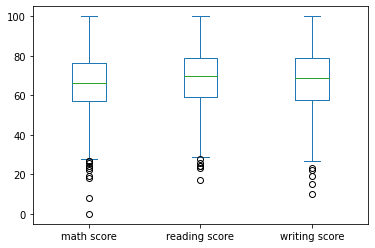

In [90]:
exploratory_data_analysis(df_grades)

**Justificación:**

```
Escriba aquí su justificación

- Todos los puntajes no sobrepasan los 100, estan contenidos en la escala 0-100
- No hay valores nulos
- No hay nombres duplicados
- Se confirma que la mediana de matématica sigue siendo la más baja de los
3 examenes
- La única prueba donde hay un score de 0 es matématica
- Además de la mediana, matématica tiene el promedio, el q25 y q75 menor
que los demás test. Tambien el mayor número de estudiantes con puntaje más 
bajo (bajo el bigote inferior).
```

## 1.3 Trabajando con Datos

<p align="center">
  <img src="https://media3.giphy.com/media/YQitE4YNQNahy/giphy-downsized-large.gif">
</p>

### 1.3.1 Transformación de notas a "Nota Chilena" [0.5 Puntos]

En una de las reuniones con Don Caguayo este les comenta su intención de pasar todas sus notas a la "Escala Chilena". Para esto les facilita la siguiente ecuación:

$$Nota \, Chilena= \% \, de \, logro*0.06 + 1$$

Utilizando la ecuación entregada, cree una función que le permita pasar a la escala Chilena las notas que se escapan del rango [1,7] y entregue las notas redondeadas al segundo decimal.

**To-Do**

- [X] Tranforme los valores a la escala chilena.

**Respuesta:**

In [127]:
def nota_chilena(dataframe_in, columna):
  copia = dataframe_in.copy()
  copia[columna] = [
      round(i * 0.06 + 1, 2) if i < 1 or i > 7 else i
      for i in copia[columna]
  ]
  return copia

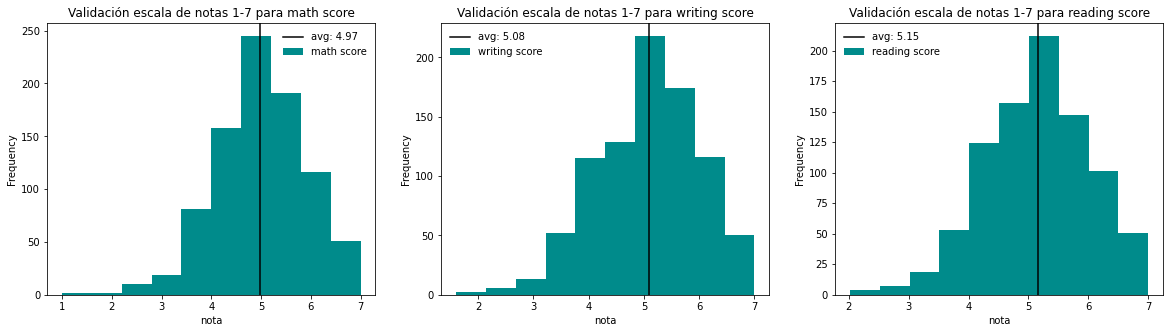

In [128]:
plt.figure(figsize=(20, 5))
for i, c in enumerate(["math score", "writing score", "reading score"]):
  df_grades = nota_chilena(df_grades, c)
  plt.subplot(1, 3, i + 1)
  df_grades[c].plot(kind="hist", color="darkcyan")
  plt.axvline(df_grades[c].mean(), color='k', zorder=2, 
            label=f"avg: {str(df_grades[c].mean())[:4]}")
  plt.title(f"Validación escala de notas 1-7 para {c}")
  plt.xlabel("nota")
  plt.legend(frameon=False);

### 1.3.2 Obtención de promedio de alumnos [0.5]

Con todas las notas adjuntadas, la prestigiosa Universidad De la Cachaña necesita obtener el promedio general de cada uno de los alumnos. Para esto se le solicita que calcule el promedio con cada una de las asignaturas y el promedio se anexe como una nueva columna al final del DataFrame original. Cabe señalar que las notas deben ser redondeadas al segundo decimal.

**To-Do:**
- [X] Crear función que nos permite obtener el promedio de cada uno de los alumnos y anexar esta información en el DataFrame original.


**Respuesta:**

In [133]:
def alumnos_promedio(dataframe_in):
  """Retorna un dataframe con igual columnas a dataframe_in +
  columna GPA con promedio de los scores"""

  return (
      dataframe_in
        .assign(GPA = lambda df_: (df_.select_dtypes(["float32", "float64"])
                                    .mean(axis=1).round(2))))

In [134]:
df_grades = alumnos_promedio(df_grades)
df_grades.head()

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,3.58
1,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86,5.78
2,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78,5.04
3,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56,5.64
4,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22,6.34


**Respuesta Esperada:**

In [25]:
df_grades = alumnos_promedio(df_grades)
df_grades.head()

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,3.58
1,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86,5.78
2,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78,5.04
3,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56,5.64
4,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22,6.34


### 1.3.3 Reprobados y Destacados [1.5 Punto, 0.5 Cada DataFrame]

Contentos con su desempeño, la Universidad les solicita que obtengan los alumnos **quienes han reprobado el año y los que han tenido desempeño de destacado**. Para esto se considerará que un **alumno ha reprobado el año cuando el promedio de notas es inferior a 4.0** en la Escala Chilena, y se considerará **destacado si posee notas superiores a 5.8 en todas las asignaturas** (o sea notas superiores a 5.8 en `math score`, `reading score` y `writing score`).

Cree una función que permita obtener tres Dataframes: 
- El primero deberá poseer solamente los alumnos que han reprobado en la prestigiosa universidad.
- El segundo debe entregar un DataFrame similar al original, pero marcado con una "R" el promedio de notas de los alumnos reprobados.
- El tercero será un Data Frame con los alumnos destacados ordenados de mayor a menor.

**To-Do:**

- [X] Obtener DataFrame con los alumnos que reprobaron el año.
- [X] Obtener DataFrame similar al original, pero marcados con una "R" el atributo GPA de los alumnos reprobados.
- [X] Obtener DataFrame con los alumnos destacados ordenados de mayor a menor.

**Respuesta:**

In [135]:
def reprobados_destacados(dataframe_in):
  """
  Retorna una tripleta de DataFrames con las siguientes caracteristicas:

    - DataFrame con las observaciones de alumnos reprobados; criterio
      es que el alumno haya obtenido un GPA < 4.0

    - DataFrame con todas las observaciones destacando con una "R" en la
      columna GPA a los alumnos que cumplan criterio reprobado. El resto
      de los alumnos tiene su promedio en escala de notas chilena

    - DataFrame con las observaciones de alumnos destacados ordenados de forma
      descendente según GPA; criterio 
      es que el alumno haya  obtenido en cada uno de los ramos una nota
      superior a 5.8
  """
  # 1er DataFrame
  reprobados = dataframe_in["GPA"] < 4.0
  alumnos_reprobados = dataframe_in.loc[reprobados, :]

  # 2do DataFrame
  marcar_reprobados = dataframe_in.copy()
  marcar_reprobados.loc[reprobados, "GPA"] = "R"

  # 3er DataFrame
  destacados = (
        (dataframe_in["math score"] > 5.8)    &
        (dataframe_in["reading score"] > 5.8) & 
        (dataframe_in["writing score"] > 5.8))
  destacados = dataframe_in.loc[destacados, :] \
                 .sort_values(by=["GPA"], ascending=False)

  return alumnos_reprobados, marcar_reprobados, destacados

In [136]:
dataframe1, dataframe2, dataframe3 = reprobados_destacados(df_grades)

In [28]:
dataframe1

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,3.58
7,Mikki Amaya,female,group A,high school,free/reduced,completed,3.04,3.88,3.46,3.46
16,Samuel Dougal,male,group C,master's degree,free/reduced,completed,3.76,3.52,3.76,3.68
39,Rodger Talavera,male,group B,high school,free/reduced,none,3.16,2.74,2.62,2.84
43,Morris Johnson,male,group A,associate's degree,free/reduced,completed,3.40,4.30,4.18,3.96
...,...,...,...,...,...,...,...,...,...,...
852,Charles Harian,male,group C,some high school,free/reduced,completed,3.70,4.12,3.94,3.92
854,Wendy Gunnell,female,group D,some high school,free/reduced,none,2.62,3.04,2.92,2.86
868,Diana Costa,female,group C,high school,free/reduced,none,3.46,3.76,3.58,3.60
869,Amy Sieving,female,group C,high school,standard,none,2.74,2.74,2.80,2.76


In [29]:
dataframe2

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,R
1,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86,5.78
2,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78,5.04
3,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56,5.64
4,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22,6.34
...,...,...,...,...,...,...,...,...,...,...
870,Richard Young,male,group D,high school,standard,none,5.14,5.50,5.26,5.3
871,Wanda Russell,female,group B,high school,free/reduced,completed,2.38,3.64,3.16,R
872,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,4.96,5.44,5.86,5.42
873,Laurie Carter,female,group B,some high school,standard,completed,4.24,4.66,4.72,4.54


In [30]:
dataframe3

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
435,Richard Pryor,male,group E,bachelor's degree,standard,completed,7.00,7.00,7.00,7.00
838,Sandra Pompey,female,group E,associate's degree,standard,none,7.00,7.00,7.00,7.00
253,Elizabeth Beasley,female,group E,bachelor's degree,standard,none,7.00,7.00,7.00,7.00
313,Emma Gray,female,group E,bachelor's degree,standard,completed,6.94,7.00,7.00,6.98
188,Emma Brasher,female,group D,some high school,standard,completed,6.82,7.00,7.00,6.94
...,...,...,...,...,...,...,...,...,...,...
606,Rolando Widmer,male,group C,high school,standard,completed,5.92,6.04,5.92,5.96
198,Lucille Stanphill,female,group C,high school,standard,none,5.86,6.04,5.92,5.94
201,Steven Kelly,male,group D,some college,standard,none,5.86,5.92,6.04,5.94
811,Peter Perez,male,group D,master's degree,standard,none,5.86,5.86,6.04,5.92


**Resultados esperados:**

In [31]:
dataframe1, dataframe2, dataframe3 = reprobados_destacados(df_grades)
dataframe1

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,3.58
7,Mikki Amaya,female,group A,high school,free/reduced,completed,3.04,3.88,3.46,3.46
16,Samuel Dougal,male,group C,master's degree,free/reduced,completed,3.76,3.52,3.76,3.68
39,Rodger Talavera,male,group B,high school,free/reduced,none,3.16,2.74,2.62,2.84
43,Morris Johnson,male,group A,associate's degree,free/reduced,completed,3.40,4.30,4.18,3.96
...,...,...,...,...,...,...,...,...,...,...
852,Charles Harian,male,group C,some high school,free/reduced,completed,3.70,4.12,3.94,3.92
854,Wendy Gunnell,female,group D,some high school,free/reduced,none,2.62,3.04,2.92,2.86
868,Diana Costa,female,group C,high school,free/reduced,none,3.46,3.76,3.58,3.60
869,Amy Sieving,female,group C,high school,standard,none,2.74,2.74,2.80,2.76


In [32]:
dataframe2

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,R
1,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86,5.78
2,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78,5.04
3,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56,5.64
4,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22,6.34
...,...,...,...,...,...,...,...,...,...,...
870,Richard Young,male,group D,high school,standard,none,5.14,5.50,5.26,5.3
871,Wanda Russell,female,group B,high school,free/reduced,completed,2.38,3.64,3.16,R
872,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,4.96,5.44,5.86,5.42
873,Laurie Carter,female,group B,some high school,standard,completed,4.24,4.66,4.72,4.54


In [33]:
dataframe3

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
435,Richard Pryor,male,group E,bachelor's degree,standard,completed,7.00,7.00,7.00,7.00
838,Sandra Pompey,female,group E,associate's degree,standard,none,7.00,7.00,7.00,7.00
253,Elizabeth Beasley,female,group E,bachelor's degree,standard,none,7.00,7.00,7.00,7.00
313,Emma Gray,female,group E,bachelor's degree,standard,completed,6.94,7.00,7.00,6.98
188,Emma Brasher,female,group D,some high school,standard,completed,6.82,7.00,7.00,6.94
...,...,...,...,...,...,...,...,...,...,...
606,Rolando Widmer,male,group C,high school,standard,completed,5.92,6.04,5.92,5.96
198,Lucille Stanphill,female,group C,high school,standard,none,5.86,6.04,5.92,5.94
201,Steven Kelly,male,group D,some college,standard,none,5.86,5.92,6.04,5.94
811,Peter Perez,male,group D,master's degree,standard,none,5.86,5.86,6.04,5.92


**Respuesta:**

```
Según los resultados reportados en los 3 DataFrames anteriores:

- 86 alumnos reprobaron (i.e. 9,82% del total) según el criterio de promedio GPA menor a 4.0.
- 94 alumnos destacados (i.e. 10,74% del total) según el criterio de obtener nota sobre 5.8 en cada una de las 3 asignaturas. Solo 3 alumnos obtuvieron un GPA de 7.0.
```

### 1.3.4 Consultas de Alumnos [0.5 Puntos]

Algunos padres (extremadamente entrometidos y...) preocupados por el desempeño de sus hijos, desean saber estos han aprobado o no el año. Como la tarea de buscar a mano cada uno de estos alumnos en el `DataFrame` resulta demasiado tedioso, el rector le solicita crear una función que tenga como entrada el `DataFrame` donde se realizará la busqueda y una lista con los nombres de los alumnos, luego la función deberá retornar un `DataFrame` con los nombres de los alumnos y el promedio general de cada uno. 

Creada la función busque el promedio general de los siguientes alumnos en el segundo Data frame creado en la sección 1.3.3:

`['Lucille Stanphill','Marcus Mcfarland', 'Matthew Freeman', 'Dana Mojica', 'Paul Hyder', 'Jeffrey Korn', 'Robert Strain',
'Ronald Jett', 'Lorena Reed', 'Hazel Posey']`

**Hint:** Puede serle de utilidad utilizar `isin()`.

**Respuesta:**

In [137]:
def consulta_gpa(dataframe_in, lista_alumnos):
  """Retorna DataFrame con nombre y promedio de los alumnos especificados en
  lista_alumnos"""
  filtrar_alumnos = dataframe_in.names.isin(lista_alumnos) 

  print(f"Nota: Hay {len(lista_alumnos) - filtrar_alumnos.sum()} alumnos que no "
         "están en los registros.\n")
  
  return (dataframe_in
            .loc[filtrar_alumnos, ["names", "GPA"]])
    

lista_alumnos = [
    "Lucille Stanphill",
    "Marcus Mcfarland",
    "Matthew Freeman",
    "Dana Mojica",
    "Paul Hyder",
    "Jeffrey Korn",
    "Robert Strain",
    "Ronald Jett",
    "Lorena Reed",
    "Hazel Posey",
]
consulta_gpa(dataframe2, lista_alumnos)

Nota: Hay 2 alumnos que no están en los registros.



,names,GPA
198,Lucille Stanphill,5.94
372,Marcus Mcfarland,4.86
418,Matthew Freeman,R
421,Dana Mojica,R
675,Robert Strain,4.4
679,Ronald Jett,R
681,Hazel Posey,R
753,Lorena Reed,R


### 1.3.5 Quintiles de Rendimiento [0.5 Puntos]

El rector, intrigado por saber si existe una relación entre el nivel educacional de los padres y las notas de sus hijos les plantea estudiar dicha relación. Para esto, les solicita que desde el `DataFrame` que posee a todos los alumnos (`DataFrame` obtenido tras la limpieza), generen una nueva columna que clasifique en quintiles de rendimiento para sus alumnos: `['Bajísimo', 'Bajo', 'Medio', 'Alto', 'Muy alto']`. (investigar `qcut()`)

Hecho esto, grafique a través de un scatter plot el nivel educacional de los padres v/s el promedio de los alumnos, utilice los cuantiles generados anteriormente para mostrar en que cuantil se encuentra cada uno de los datos.

Realizado el grafico, responda la siguiente pregunta: **¿Es posible visualizar alguna tendencia en el gráfico?.**



**Respuesta:**

In [35]:
# Código para quintiles 
# La variable que contenga los quintiles debe llamarse GPA cuantiles para que el gráfico funcione.
etiquetas_quintiles=['Bajísimo', 'Bajo', 'Medio', 'Alto', 'Muy alto']
df_grades["GPA cuantiles"] = pd.qcut(df_grades.GPA, 
                                     q=[0, 0.20, 0.4, 0.6, 0.8, 1.0],
                                     labels = etiquetas_quintiles)

# Código de gráfico 
fig= px.scatter(
    df_grades.sort_values(by="GPA"),
    x="GPA",
    y="parental level of education",
    hover_data=["gender"],
    color="GPA cuantiles",
    title="GPA por Nivel de educación de los padres",
    color_discrete_sequence=["tomato", "orange", "yellow", "greenyellow", "green"]
)

fig

In [139]:
print("Media, mediana y desviación estándar del GPA por nivel educacional de los padres\n")

(df_grades.groupby(['parental level of education'])['GPA']
 .describe()
 .get(["mean", "50%", "std"])
 .reset_index().sort_values(by=["mean"], ascending=False))

Media, mediana y desviación estándar del GPA por nivel educacional de los padres



,parental level of education,mean,50%,std
3,master's degree,5.371667,5.33,0.843991
1,bachelor's degree,5.324340,5.27,0.793339
0,associate's degree,5.187449,5.24,0.835610
4,some college,5.104084,5.14,0.814359
5,some high school,4.920375,5.05,0.911808
2,high school,4.803218,4.91,0.805736


```
Escriba aqui su respuesta
```

Se observa una tendencia donde a mayor nivel educacional de los padres, aumenta la proporción de alumnos en el quintil de promedio general Muy Alto, y disminuye la cantidad de alumnos en el quintil de promedio general Bajísimo. Esto se corrobora ovbservando el promedio general (tabla), donde Master's degree tiene el mayor promedio.

**Respuesta esperada:**

In [37]:
# Código para quintiles 
# La variable que contenga los quintiles debe llamarse GPA cuantiles para que el gráfico funcione.

# Código de gráfico 
fig = px.scatter(
    df_grades.sort_values(by="GPA"),
    x="GPA",
    y="parental level of education",
    hover_data=["gender"],
    color="GPA cuantiles",
    title="GPA por Nivel de educación de los padres",
    color_discrete_sequence=["tomato", "orange", "yellow", "greenyellow", "green"]
)

fig


# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

<p align="center">
  <img src="https://media1.tenor.com/images/2f7df460196625edc45b8380d158e5ee/tenor.gif?itemid=16669403">
</p>

<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>